# Naive Bayes Classification 

datacamp: https://www.datacamp.com/tutorial/naive-bayes-scikit-learn

Analytical Vidya: https://www.analyticsvidhya.com/blog/2021/11/implementation-of-gaussian-naive-bayes-in-python-sklearn/

_______________________________________________________________________________________________________________________________

__Def__: 
Naive Bayes is the easiest and rapid classification method available, and it is well suited for dealing with enormous amounts of information. 

__use__: In several applications such as spam filtering, text classification, sentiment analysis, and recommender systems, the Naive Bayes classifier has shown to be effective. 
- It makes predictions about unknown classes using the Bayes theory of probability.




__Characteristics__:
- The Naive Bayes method makes the assumption that the predictors contribute equally and independently to selecting the output class.
- Although the Naive Bayes model’s assumption that all predictors are independent of one another is unfeasible in real-world circumstances, this assumption produces a satisfactory outcome in the majority of instances.
- Naive Bayes is often used for text categorization since the dimensionality of the data is frequently rather large.



__Types__:

- __1) Gaussian Naive Bayes__

This classifier is employed when the predictor values are continuous and are expected to follow a Gaussian distribution.

- __2) Bernoulli Naive Bayes__

When the predictors are boolean in nature and are supposed to follow the Bernoulli distribution, this classifier is utilized.

- __3) Multinomial Naive Bayes__

This classifier makes use of a multinomial distribution and is often used to solve issues involving document or text classification.

__formulae 1__:

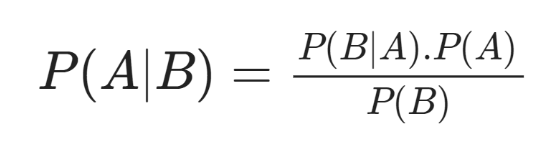


Where

- A and B are two events
- P(A) is the independent probability of A
- P(B) is the independent probability of B
- P(A|B) is the probability of event A where event B has already happened.
- P(B|A) is the probability of event B where event A has already happened.



__formulae 2__:

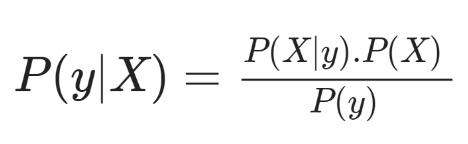


Where

- X = x1,x2,x3,.. xN аre list оf indeрendent рrediсtоrs
- y is the class label
- P(y|X) is the probability of label y given the predictors X
- The above equation may be extended as follows:

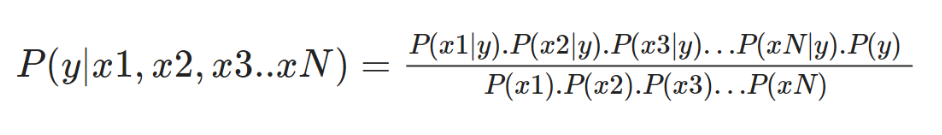





### Approach
__1)Single feature__
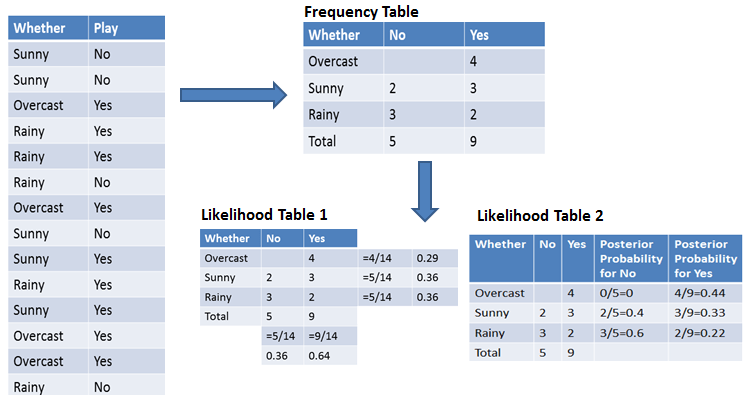




In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, classification_report
#import joblib for saving model

In [2]:
data = pd.read_csv('iphone_purchase_records.csv')

__Steps:__
- Data Preprocessing 
- Independent and dependent variable 
- Label encoding 
- Train and test split 
- Feature scaling 

### 1. Data Preprocessing

In [3]:
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
data.tail()

,Gender,Age,Salary,Purchase Iphone
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0
399,Female,49,36000,1


In [7]:
data.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [10]:
data.isna().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [13]:
data['Purchase Iphone'].value_counts()
# 1: Purchased an iPhone (Positive class)
# 0: Not purchased iPhone (Negative class)

0    257
1    143
Name: Purchase Iphone, dtype: int64

### 2. Independent ( X ) and Dependent variable ( y )

In [14]:
# Independent features 
X = data.iloc[:, :-1].values
X

# iloc: This is a method used to select data in a DataFrame by integer-based indexing.
# [:, :-1]:  all rows & all columns except last (till 2nd last)
# .values:  it belongs to numpy and convert into array 

array([['Male', 19, 19000],
       ['Male', 35, 20000],
       ['Female', 26, 43000],
       ...,
       ['Female', 50, 20000],
       ['Male', 36, 33000],
       ['Female', 49, 36000]], dtype=object)

In [15]:
# Dependent features 
y = data.iloc[:, 3].values
y

# [:, 3]: all rows and only 3rd column

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

### 3. Label encoding

In [16]:
# from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
X


#here we converted 1st column of gender into 1s & 0s

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

### 4. Train - Test Split

In [19]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3 ,random_state=1)

In [20]:
print(X_train.shape, X_test.shape)

(120, 3) (280, 3)


### 5. Feature scaling

In [21]:
# from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Training already done on X_train, 
# therefore, no need to train on X_test and fit into it

In [22]:
print(X_train)

[[-0.96720415 -0.43998424  2.18185653]
 [-0.96720415  0.30234418  0.23992682]
 [ 1.03390789 -0.62556635 -0.37923917]
 [ 1.03390789  0.11676207  1.75969789]
 [ 1.03390789 -0.99673056 -1.4487077 ]
 [-0.96720415 -0.81114845  0.32435855]
 [ 1.03390789 -1.73905898 -0.04151227]
 [ 1.03390789 -1.73905898  0.38064637]
 [ 1.03390789 -0.81114845 -0.29480744]
 [-0.96720415  0.11676207  1.75969789]
 [ 1.03390789 -0.62556635  0.12735119]
 [ 1.03390789  0.30234418  0.01477555]
 [-0.96720415 -1.08952161  0.23992682]
 [ 1.03390789  0.20955313 -0.29480744]
 [-0.96720415 -0.25440214 -1.30798816]
 [-0.96720415  0.95188155  0.69022936]
 [ 1.03390789  0.39513523  2.18185653]
 [ 1.03390789 -0.90393951  0.21178291]
 [-0.96720415  1.23025471  1.75969789]
 [-0.96720415 -0.43998424 -1.22355643]
 [ 1.03390789  0.39513523 -0.49181481]
 [ 1.03390789  0.67350839 -1.39241989]
 [-0.96720415 -0.06882003 -0.40738308]
 [ 1.03390789 -0.34719319  1.1405319 ]
 [ 1.03390789 -0.25440214 -0.91397344]
 [-0.96720415 -1.46068582

In [24]:
# from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB()

In [25]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [30]:
y_test

#actual

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

### 6. Preformance of model

In [31]:
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt
print(confusion_matrix(y_test, y_pred))

# TN-FP
# FN-TP


# revise it again
# TN: Actual value is 0 and Predicted Value is also 0.
# FP : Actual Value is 0 and Predicted Value is 1. 
# TP: Actual value is 1 and Predicted Value is also 1.
# FN : Actual Value is 1 and Predicted Value is 0.


[[168  11]
 [ 31  70]]


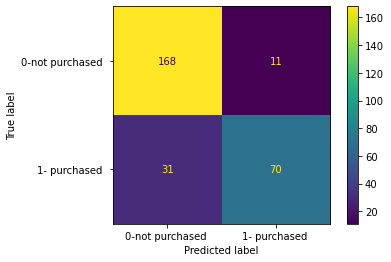

In [32]:
#display of confusionmatrix
table= confusion_matrix(y_test, y_pred, labels=[0,1])

disp = ConfusionMatrixDisplay(confusion_matrix= table, display_labels=["0-not purchased ", "1- purchased "])
disp.plot()

In [33]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('True negative', tn)
print('False positive', fp)
print('False negative', fn)
print('True positive', tp)

True negative 168
False positive 11
False negative 31
True positive 70


In [37]:
#from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       179
           1       0.86      0.69      0.77       101

    accuracy                           0.85       280
   macro avg       0.85      0.82      0.83       280
weighted avg       0.85      0.85      0.85       280



### 7. Svaing Trained Model

In [38]:
# Save the model 
import joblib 
joblib.dump(classifier,'naive_bayes.sav')

['naive_bayes.sav']

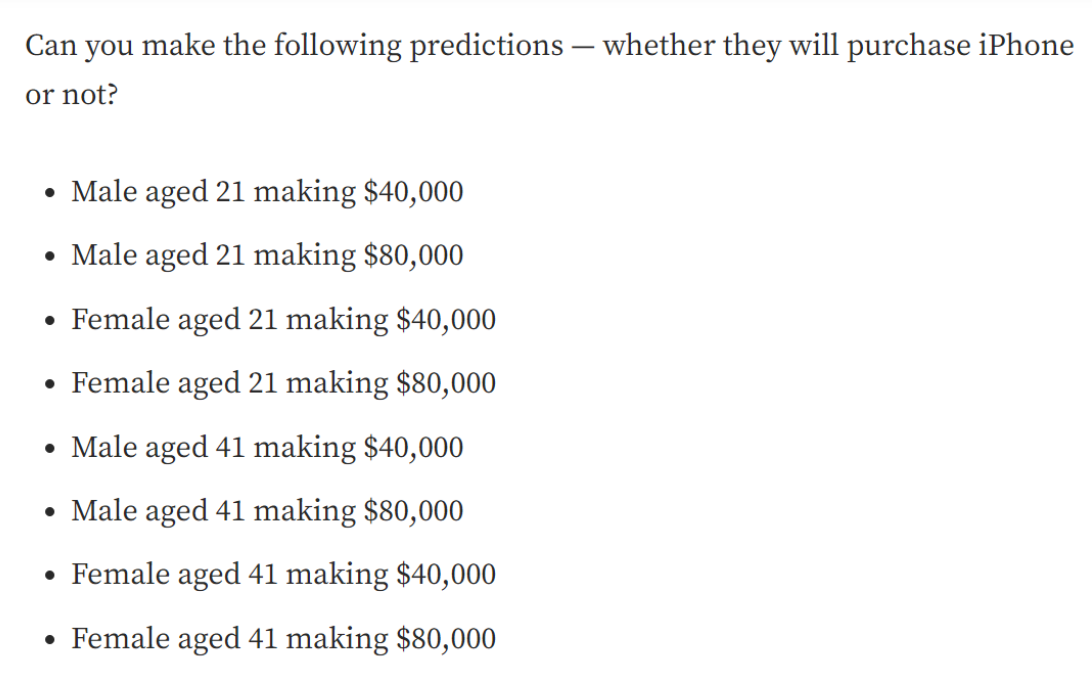

In [39]:
# loading this model again 
import joblib 
model=joblib.load('naive_bayes.sav')

In [40]:
#data entry

x1 = sc.transform([[1,21,40000]])
x2 = sc.transform([[1,21,80000]])
x3 = sc.transform([[0,21,40000]])
x4 = sc.transform([[0,21,80000]])
x5 = sc.transform([[1,41,40000]])
x6 = sc.transform([[1,41,80000]])
x7 = sc.transform([[0,41,40000]])
x8 = sc.transform([[0,41,80000]])

In [41]:
print("Male aged 21 making $40k will buy iPhone:", classifier.predict(x1))
print("Male aged 21 making $80k will buy iPhone:", classifier.predict(x2))
print("Female aged 21 making $40k will buy iPhone:", classifier.predict(x3))
print("Female aged 21 making $80k will buy iPhone:", classifier.predict(x4))
print("Male aged 41 making $40k will buy iPhone:", classifier.predict(x5))
print("Male aged 41 making $80k will buy iPhone:", classifier.predict(x6))
print("Female aged 41 making $40k will buy iPhone:", classifier.predict(x7))
print("Female aged 41 making $80k will buy iPhone:", classifier.predict(x8))

Male aged 21 making $40k will buy iPhone: [0]
Male aged 21 making $80k will buy iPhone: [0]
Female aged 21 making $40k will buy iPhone: [0]
Female aged 21 making $80k will buy iPhone: [0]
Male aged 41 making $40k will buy iPhone: [0]
Male aged 41 making $80k will buy iPhone: [0]
Female aged 41 making $40k will buy iPhone: [0]
Female aged 41 making $80k will buy iPhone: [0]


__note:__ here for age 41 it predicted that it cannot buy iphone....now try with different age gorup combination 

In [43]:
x9 = sc.transform([[0,51,80000]])
x10 = sc.transform([[0,51,30000]])
x11 = sc.transform([[0, 21,100000]])
print("Female aged 51 making $80k will buy iPhone:", classifier.predict(x9))
print("Female aged 51 making $30k will buy iPhone:", classifier.predict(x10))
print("Female aged 21 making $100k will buy iPhone:", classifier.predict(x11))

Female aged 51 making $80k will buy iPhone: [1]
Female aged 51 making $30k will buy iPhone: [1]
Female aged 21 making $100k will buy iPhone: [0]


________________________________________________________________________________________________________________________

### trying decision tree


In [44]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

In [45]:
#Create Decision Tree classifer object
dTree = DecisionTreeClassifier()

# Train Decision Tree Classifer
dTree = dTree.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = dTree.predict(X_test)

In [46]:
X_test.shape

(280, 3)

In [47]:
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [48]:
y_pred.shape

(280,)

In [49]:
print(confusion_matrix(y_test, y_pred))

[[159  20]
 [ 22  79]]


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       179
           1       0.80      0.78      0.79       101

    accuracy                           0.85       280
   macro avg       0.84      0.84      0.84       280
weighted avg       0.85      0.85      0.85       280



### Diff btw naive bayes & decision tree

- __precision__: N: 84-86% __ D: 88-80%
- __recall__   : N: 94-69% __ D: 89-78%
- __f1score__  : N: 89-77% __ D: 88-79%
- __support    : it is freq. hance same in both__
- __accuracy__ : same 85%
